In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

import json, random

In [2]:
df = pd.read_pickle('/Volumes/web/Python/Multiplicaciones/Resultados.pkl')

Q1 = df.Seconds.quantile(0.25)
Q3 = df.Seconds.quantile(0.75)
df['OutLayers'] = (df.Seconds < (Q1 - 1 * (Q3 - Q1))) 

df['Nota'] = (df['Num 1'] * df['Num 2']) == df.Result
df['Guaus'] = (df.Seconds < 5) & (df.Nota == True)
df['Collejas'] = (df.Seconds > 12) 

df.Nota = df.Nota.map(lambda x: 0 if x == False else 10)
df.Guaus = df.Guaus.map(lambda x: 0 if x == False else 100)
df.Collejas = df.Collejas.map(lambda x: 0 if x == False else 100)

dt = (df[df.OutLayers == False]
      .groupby('Niño')
      .resample('w')
      .agg({'Nota':['count','mean'], 'Seconds': 'mean', 'Guaus':'mean', 'Collejas':'mean'})
      .reset_index()
      .set_index('Date')
      .pivot(columns = 'Niño')
     )

dt.columns = [dt.columns.levels[0][dt.columns.codes[0]],dt.columns.levels[2][dt.columns.codes[2]]]

dt

Nota                             Seconds                Guaus  \
Niño       Adrián Pedro    Adrián     Pedro    Adrián     Pedro     Adrián   
Date                                                                         
2020-05-24   3326  2876  9.774504  9.822670  8.514795  8.143504  26.368010   
2020-05-31    710   760  9.802817  9.934211  7.308588  6.587940  24.084507   

                        Collejas             
Niño            Pedro     Adrián      Pedro  
Date                                         
2020-05-24  24.269819  13.980758  11.717663  
2020-05-31  26.315789   9.718310   2.763158

* Función para crear los heatmap.

In [3]:
def plot(ax, boy, Var, Color, agg, x):
    Grafico = sns.heatmap((pd
                           .pivot_table(df[(df['Niño'].eq(boy)) & (df.OutLayers == False)]
                                        .loc[datetime.strftime(dt.index[len(dt.index) -1] + timedelta(days = -6), '%Y%m%d'):]
                                        , index = 'Num 1'
                                        , columns = 'Num 2'
                                        , values = [Var]
                                        , aggfunc = [np.mean])
                           .transpose()
                           .reset_index()
                           .drop(['level_0','level_1','Num 2'], axis = 1)
                           .transpose()
                          )
                          , ax = ax
                          , annot = True
                          , annot_kws = {"size": 10}
                          , fmt= '.2g' if Var != 'Guaus' else '.0f'
                          , linewidth = 0.5
                          , cbar = True
                       #   , vmin = 0 if a.min().min() == 10 else a.min().min() #Para usar crear dataframe llamado a con el primer parámetro
                          , cmap = Color)

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.tick_params(left = False, bottom = False, labelsize=12, labelcolor = 'grey')
    Grafico.set_yticklabels(Grafico.get_yticklabels(), rotation = 0)
    
    if Var == 'Nota':
        ax.set_title(boy, fontsize = 20, color = 'Red')
        
    if x == False:
        ax.set_ylabel(Var, size = 12, color = 'grey')
    else:
        ax.set_ylabel(' ')

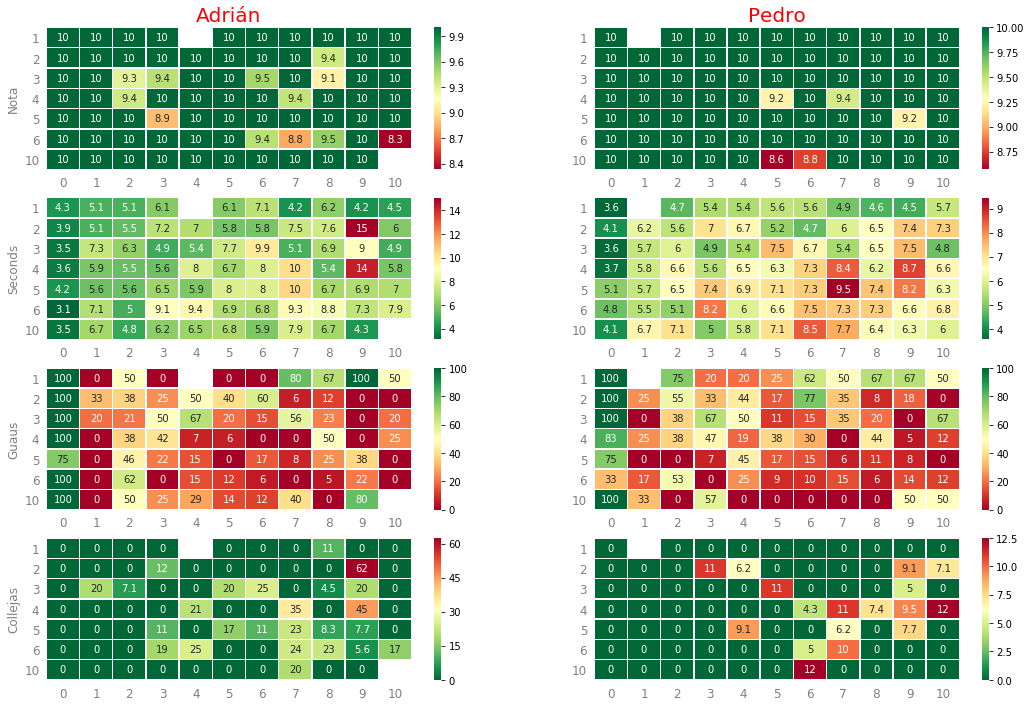

In [4]:
Boy, i = ['Pedro', -1]
fig, axs = plt.subplots(4, 2, figsize = (18,12))
for ax in axs.flat:
    Boy = 'Pedro' if Boy == 'Adrián' else 'Adrián'
    i += 1
    
    if i % 2 == 0:
        Kpi = ['Nota','Seconds','Guaus','Collejas'][int(i / 2)]
        x = False
        
        C = [plt.cm.get_cmap('RdYlGn')
             , plt.cm.get_cmap('RdYlGn').reversed()
             , plt.cm.get_cmap('RdYlGn')
             , plt.cm.get_cmap('RdYlGn').reversed()
            ][int(i / 2)]
        
    else:
        x = True
    
    plot(ax, Boy, Kpi, C, np.mean, x)

plt.show()
plt.close()

Para hacer cambios en el json <b>OJO</b> tener cargadas las listas previamente

In [5]:
with open('Config.json', mode='r', encoding='utf-8') as file:
    config = json.load(file)
    
config

{'tablas': [[1, 2, 3, 4, 5, 6, 10], [1, 2, 3, 3, 2, 3, 1]],
 'Multiplicador': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  [1, 1, 3, 4, 4, 3, 5, 5, 5, 5, 2]],
 'smsTiempo': ['Tiempazo.... ',
  'Y en solo ',
  'Muy bien, y en solo ',
  'Perfecto ',
  'Guau '],
 'emojis': {'Adrián': ['😍', '😘', '🧐', '👏'], 'Pedro': ['😎', '😳', '👍', '😃']},
 'Presion': ['{} se te está pasando el tiempo.... Pensando.... Pensando....',
  'Si esperasen tanto las liebres, no quedaba ni una.',
  'Los he visto mas ligeros.',
  'Venga {} que corre el tiempo.']}

In [6]:
random.choice(config['Presion']).format(Boy)

'Los he visto mas ligeros.'

* Grabar Listas

In [7]:
#del config['emojis']['Adrián'][6]

#Lista = []
#Lista.append('{} se te está pasando el tiempo.... Pensando.... Pensando....')
#Lista.append('Si esperasen tanto las liebres, no quedaba ni una.')
#Lista.append('Los he visto mas ligeros.')
#Lista.append('Venga {} que corre el tiempo.')

#config['Presion'] = Lista

with open('Config.json','w',encoding='utf8') as file:
    json.dump(config, file, indent = 1)

In [8]:
df.Result.unique()

array([   16,    24,    27,    28,    30,    10,     9,    20,    25,
          36,     0,     2,    15,    48,    42,    40,     7,    21,
           6,    50,    18,    35,    54,     8,    12,    45,     3,
          32,     4,    26,    70,    90,    14,    60,    80,     1,
           5,   100,    13,   351,    99,    37,    56,    11, 99999,
          34,    38,    29])

* Crear np con fallos.

In [10]:
#df = pd.read_pickle('/Volumes/web/Python/Multiplicaciones/Resultados.pkl')

x = (df[(df['Niño'] == 'Adrián') 
        & ((df['Num 1'] * df['Num 2']) != df.Result)][['Num 1','Num 2']]
     .loc[datetime.strftime(datetime.now() + timedelta(days = - 7), '%Y%m%d'):]
     .to_numpy()
     .tolist()
    ) 

len(x)

81

In [11]:
with open('Config.json', mode='r', encoding='utf-8') as file:
    config = json.load(file)

Tablas = np.array(config['tablas'])
Multiplicador = np.array(config['Multiplicador'])

Tabla = []
for i in range(len(Tablas[0])):
    for k in range(len(Multiplicador[0])):
        for p in range(Tablas[1][i]):
            for r in range(Multiplicador[1][k]):
                Tabla.append([Tablas[0][i],Multiplicador[0][k]])     
                
len(Tabla)

570

In [12]:
y = Tabla + x * 3

len(y)

813

## Predicción
* Fase 2.0

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
df['Niño'] = le.fit_transform(df['Niño'])
df.head()

,Niño,Num 1,Num 2,Result,Seconds,OutLayers,Nota,Guaus,Collejas
Date,,,,,,,,,
2020-05-21 22:52:30,0,4,4,16,26.162777,False,10,0,100
2020-05-24 21:31:17,1,4,6,24,6.230030,False,10,0,0
2020-05-18 10:09:19,1,2,8,16,10.140699,False,10,0,0
2020-05-22 14:50:49,0,3,9,27,18.668110,False,10,0,100
2020-05-19 21:21:40,1,4,7,28,8.331777,False,10,0,0


In [15]:
X = df[['Niño','Num 1', 'Num 2', 'Seconds']]
y = df.Nota

XE, XT, ye, yt = train_test_split(X
                                  , y
                                  , test_size = 0.25)

XE.head()

,Niño,Num 1,Num 2,Seconds
Date,,,,
2020-05-23 21:52:43,1,3,7,7.237047
2020-05-25 11:14:35,1,6,5,9.615246
2020-05-26 10:28:23,1,4,7,6.213982
2020-05-24 21:34:53,1,6,7,7.825820
2020-05-21 22:51:51,0,4,0,3.077892


In [16]:
clf = LogisticRegression()

clf.fit(XT, yt)

clf.score(XE,ye)

predic = clf.predict_proba(XE)

predic

array([[0.01297222, 0.98702778],
       [0.01018648, 0.98981352],
       [0.01220698, 0.98779302],
       ...,
       [0.00904118, 0.99095882],
       [0.01300867, 0.98699133],
       [0.01096901, 0.98903099]])